# Práctica 16: Comunicación con periféricos

Integrar rutinas y herramientas que permitan la comunicación entre una computadora y algún sistema externo es una cualidad muy deseable en una herramienta computacional que integra una cantidad considerable de rutinas y funciones destinadas a realizar operaciones con conjunto de datos. La comunicación entre la computadora y el mundo que la rodea se realiza por medio de dispositivos llamados periféricos, los cuales a su vez se conectan físicamente con la computadora mediante diferentes conectores especializados que a su vez intercambian datos usando protocolos específicos como el USB, WiFi, ethertnet, HDMI entre otros. La adquisición de datos es una parte fundametal de la práctica de la ingeniería, en actividades como la validación de modelos matemáticos o el análisis de la información que se puede extraer de las mediciones de un fenómeno.

En esta práctica trataremos con la adquisición de datos usando periféricos conectados a la computadora, entre el universo de posibilidades, haremos adqusición de imágenes usando una cámara web disponible en la computadora o una cámara ip de libre acceso. analizaremos la posibilidad de obtener información de sensores conectados a microcontroladores de bajo costo que usaremos como tarjetas de adquisición de datos.

## Visualización y captura de imágenes desde cámaras

En la práctica 13 hicimos algunas operaciones básicas con imágenes almacenadas en el disco duro o descargadas desde algún repositorio de internet como GitHub. Es muy sencillo adquirir una imágen usando una cámara para procesarla con herramioentas y métodos identicos a los expuetos en la práctica 13. Veremos dos formas posibles de acceder a las imágenes en una cámara, usando una dirección ip en el caso de las cámaras conectadas a la misma red que se encuentra conectada nuestra computadora y que, por supuesto, tengan un acceso a su imagen de forma libre y legal. La segunda manera de obtener una imagen es usando el hardware conectado a nuestra computadora, usando el puerto USB o bien, en el caso de las laptops, la cámara web integrada al equipo. Para poder hacer uso de las rutinas que veremos en esta práctica, es necesario instalar las siguientes apps, usado la ventana de Add ons en la página principal de  MATLAB®, en donde se deben buscar e instalar los siguientes paquetes:

* MATLAB Support Package for IP Cameras: `matlab.internal.addons.showAddon('USBWEBCAM');`
* MATLAB Support Package for USB Webcams: `matlab.internal.addons.showAddon('ML_IP_CAMERAS');`

Una vez instalados los paquetes necesarios para el uso de las cámaras, podemos hacer uso de ellas para obtener imágenes para procesar o almacenar. Para acceder a la imagen de una cámara web que este conectada en red, se hace uso del protocolo TCP-IP para capturar la imagen. En internet existen algunos repositorios que ofrecen acceso a cámaras ip, por ejemplo:

https://github.com/fury999io/public-ip-cams

Tomaremos una de las direcciones ip de alguna de las cámaras disponibles en el siguiente código:


camara = 
  ipcam with properties:

         URL: 'http://185.108.19.197:10800/axis-cgi/mjpg/video.cgi'
    Username: ''
    Password: ''
     Timeout: 10

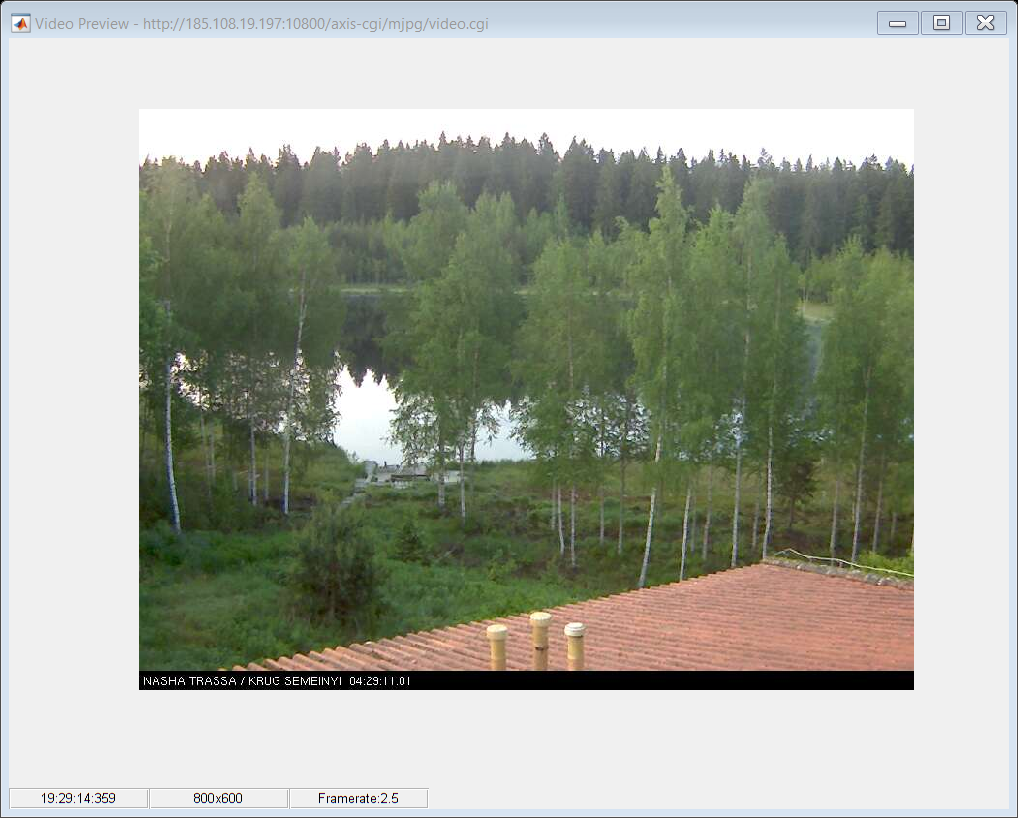

In [6]:
% Programa para acceder a una cámara ip de libre acceso, usando el paquete de soporte 
% para cámaras web
% Limpieza de variables e inicialización del espacio de trabajo
clear
close all
clc
% Se guarda la imagen de la cámara ip en un objeto llamado cámara
camara = ipcam('http://185.108.19.197:10800/axis-cgi/mjpg/video.cgi')
% Se muesta la imagen obtenida de la cámara
preview(camara)

Para ontener una fotografía usando la cámara ip se usa el comando `snapshot()`, como se muestra a continuación:

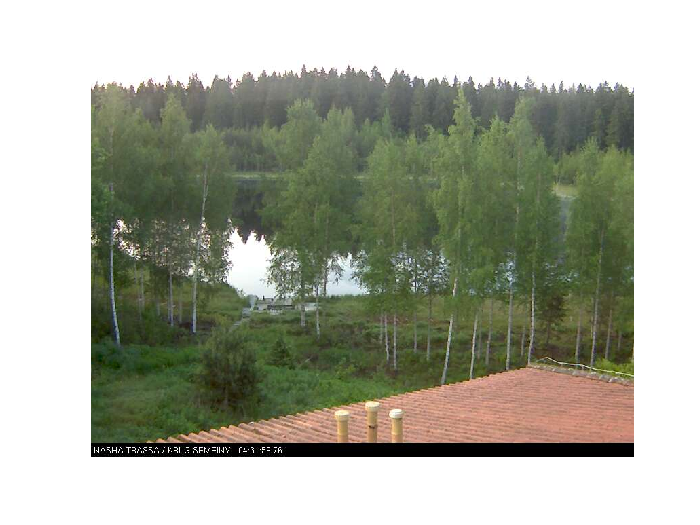

In [7]:
% Se cierra la vista previa de la cámara
closePreview(camara)
% Se hace la captura y se guarda en una variable llamada imagen
imagen = snapshot(camara);
% Se muestra la imagen de forma normal como en el caso de las imágenes 
% importadas desde archivos
imshow(imagen)

Todas las operaciones con imágenes estudiadas en la práctica 13 son válidas para la captura obtenida con este método. A continuación se muestra la descomposición en formato HSI de la captura obtenida con las instrucciones anteriores:

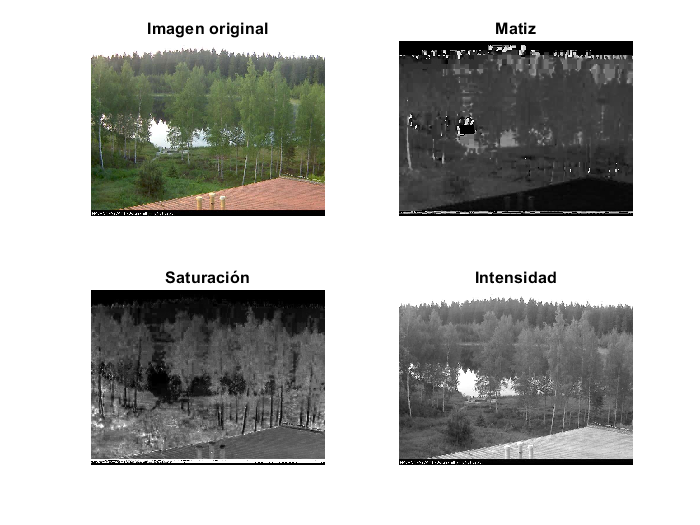

In [8]:
% Descomposición de la captura obtenida con la cámara ip 
HSI=rgb2hsv(imagen);
figure
subplot(2,2,1)
imshow(imagen)
title("Imagen original")
subplot(2,2,2)
imshow(HSI(:,:,1))
title("Matiz")
subplot(2,2,3)
imshow(HSI(:,:,2))
title("Saturación")
subplot(2,2,4)
imshow(HSI(:,:,3))
title("Intensidad")
clear('camara_web')

Para hacer uso de la cámara web o usb conectada de manera directa en nuestra computadora, haremos uso del paquete USB Webcams. Primero, se puede consultar el identificador de las cámara disponibles usando el comando webcamlist

In [24]:
clear
close all
clc
webcamlist

ans = 2x1 cell array
    {'HP True Vision FHD Camera'}
    {'Logitech StreamCam'       }

Seleccionamos alguna de las cámaras para obtener la imagen con las siguientes instrucciones:

In [25]:
camara_web=webcam('Logitech StreamCam')

camara_web = 
  webcam with properties:

                     Name: 'Logitech StreamCam'
               Resolution: '640x480'
     AvailableResolutions: {'2304x1296'  '1920x1080'  '1600x896'  '1280x720'  '960x540'  '848x480'  '640x480'  '640x360'  '424x240'  '320x240'  '176x144'}
    BacklightCompensation: 0
               Brightness: 128
                 Contrast: 128
                 Exposure: -5
             ExposureMode: 'auto'
                    Focus: 100
                FocusMode: 'auto'
                     Gain: 255
                      Pan: 0
                     Roll: 0
               Saturation: 128
                Sharpness: 128
                     Tilt: 0
             WhiteBalance: 3329
         WhiteBalanceMode: 'auto'
                     Zoom: 100

Generamos una vista previa como en el caso de la cámara ip:

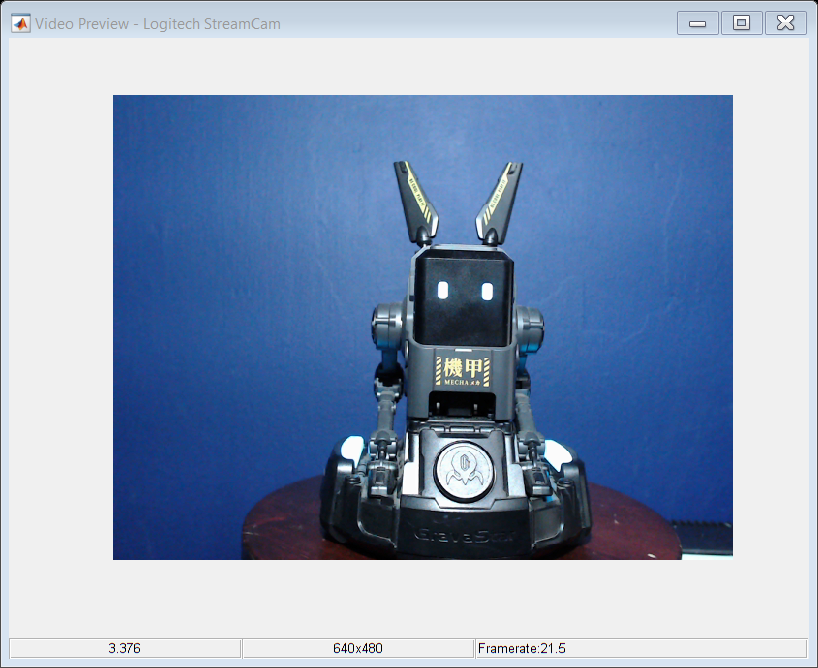

In [26]:
preview(camara_web)

In [27]:
closePreview(camara_web)

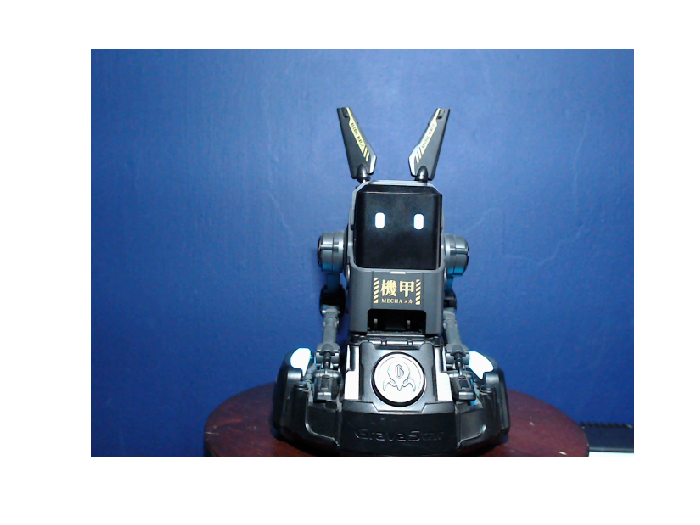

In [28]:
imagen = snapshot(camara_web);
figure
imshow(imagen)

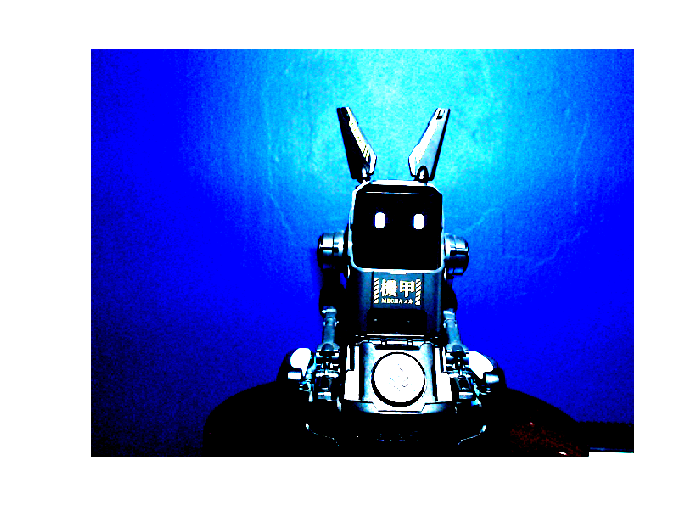

In [37]:
close all
imagen_ajustada_RGB=imadjust(imagen, [0.4 0.4 0.4; 0.6 0.6 0.6],[]);
imshow(imagen_ajustada_RGB)

Se puede mostrar la imagen en una gráfica donde se destaquen las intensidades de los tonos rojo verde y azul como se hizo en la práctica 13:

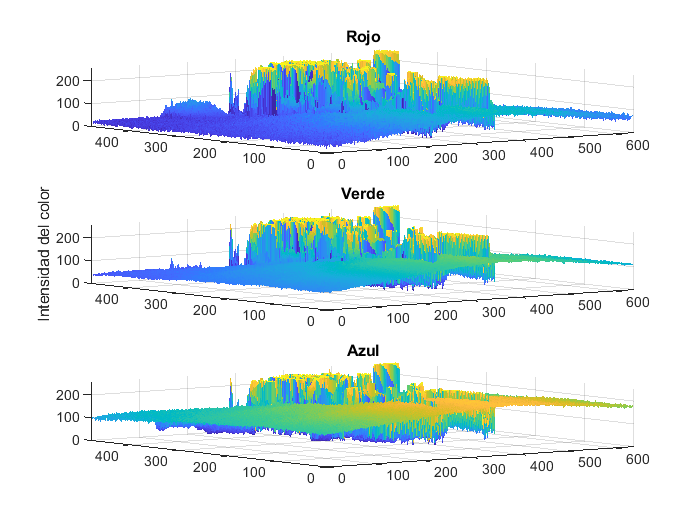

In [38]:
Rojo = imagen(:,:,1); 
Verde = imagen(:,:,2); %Descomposición de la intensidad de rojo, verde y azul de la imágen original
Azul = imagen(:,:,3);


[r,c,j]=size(imagen);% Se actualiza el tamaño de la imagen
 
figure
subplot(3,1,1)
surf(1:c,1:r,Rojo,'EdgeColor','none'); 
title("Rojo")
view(3)
subplot(3,1,2)   % Se grafican en formato de intensidad los colores
surf(1:c,1:r,Verde,'EdgeColor','none'); 
zlabel('Intensidad del color')
view(3)
title("Verde")
subplot(3,1,3)
surf(1:c,1:r,Azul,'EdgeColor','none'); 
title("Azul")
view(3)


Se muestra la imagen en formato de escala de pixeles

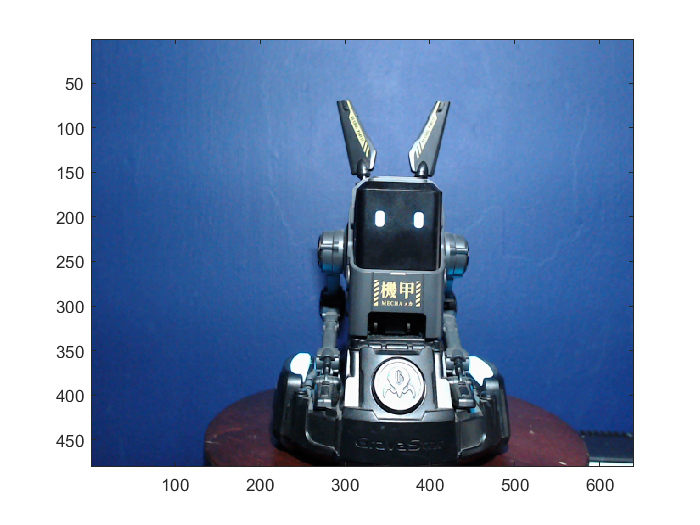

In [30]:
figure
image(imagen)

Finalmente, se limpia el objeto o variable cámara

In [31]:
clear('camara_web')

## Comunicación por puerto serie

Un bit es la unidad fundamental del sistema binario, el cual es la base de los sistemas digitales como lo son las coimputadoras, teléfonos, relojes, tablets y demás dispositivos denomindados inteligentes. El bit es  aquella entidad que puede asumir solo dos valores discretos, el uno y el cero lógico, para representar datos con diferente valor numérico o tipográfico, se usan combinaciones de un grupo de bits. Actualmente, la unidad de medida de información digital es el byte, que consta de ocho bits, es decir se pueden representar $2^8$ caracteres o combinaciones diferentes usando $8$ bits, en general se pueden representar $2^n$ caracteres usando $n$ bits. La información en el formato digital se codifica en conjuntos de unos y ceros que, cuando se intercambia entre dos o más sistemas digitales o entre un sistema digital y sus periféricos, se hace necesario el uso de cables o conexiones físicas para intercambiar los bits que conforman los datos digitales. Cuando se usa un cable para transmitir cada uno de los bits, que se convierten en  señales eléctricas que representan a los bits, se trata de un protocolo de comunicación paralelo. Este protocolo fue muy popular en las impresoras de las computadoras. 

```{figure} /images/com_paralelo.png
:height: 320px
:name: com_paralelo
Comunicación en modo paralelo.
```

El protocolo de comunicación paralelo es el más rápido debido a que las señales eléctricas se transmiten de manera directa de punto a punto, sin embargo, es necesario hacer uso de una cantidad considerable de cables que se traduce en un mayor espacio y complejidad en los circuitos impresos que se usan en los sistemas digitales. Una opción para transmitir datos es codificar la información de manera que se utilice un conjunto reducido de cables, esto se consigue transmitiendo un bit detrás de otro, separados por tiempos de aparción, duración y en un orden preciso. Cuando los datos se transmiten en este formato secuencial, se trata de un protocolo de comunicación serie.


El protocolo de comunicación serie es amplamente utilizado en un gran número de aplicaciones debido a que requiere un reducido número de líneas de comunicación entre los sistemas digitales que lo utilizan para compartir información. En el caso de las computadoras de escritorio y laptops los puertos que usan este protocolo son el puerto USB en todas sus versiones y el puerto PCIe. El puerto HDMI también usa el protocolo serie para intercambiar contenido multimedia. 

```{figure} /images/com_serie.png
:height: 320px
:name: com_serie
Comunicación en modo serie.
```

Actualmente, una gran parte de los equipos profesionales de adquisición de datos utilizan el puerto USB para transmitir granades cantidades de mediciones de señales provenientes de sensores usados en aplicaciones de experimentos para validar modelos y teorías, además de una amplia variedad de apliaciones al control de procesos. El protocolo de comunicación que utiliza el puerto USB es complicado por que permite una velocidad de transmisión considerable, actualmente de 40 Giga bits por segundo, esto quiere decir que se transmiten miles de millones de bits en un solo segundo. La descripción gráfica del protocolo serie asíncrono se presenta en la {numref}`com_serie_protocolo`

Una alternativa mas sencilla para el intercambio de información entre una computadora y algún sistema digital como un microcontrolador o tarjeta Arduino, es el protocolo serie asíncrono. El protocolo serie asíncrono se especifica en los siguientes parámetros principales:

* Identificador de puerto: En el sistema operativo más comun se usa el formato "COMXX", donde COM alude a comunicación y XX es un entero que identifica el número de puerto, en sistemas operativos como linux el identificador es típicamente "dev/ttyXX".

* BaudRate: Determina la cantidad de bits que se transmiten de un sistema a otro en un segundo. Valores típicos son 9600, 115200 y en ocasiones especiales hasta 2000000.

* Bits de datos: Determina la cantidad de bits que contiene cada uno de los datos a transmitir. Usualmente se utizan 8 bits de datos como estandard, como ya se había mensionado, se trata de un byte.

* Bits de inicio y bits de fin de trama: Cada conjunto de datos se señaliza usando una combinación de bits que funciona como un encabezado y como un terminador de trama para que el sistema identifique cuando inicia un dato y cuando termina. Usualmente se utiliza un solo bit de inicio y uno de parada.
* Tiempo de espera: Se identifica como timeout, es el tiempo máximo que esperará el sistema digital a recibir una respuesta sin considerar un error de comunicación.
* Bit de paridad: se usa para detectar errores en la transmisión, usualmente indica si se envía una cantidad par de unos o de ceros para corroborar que el dato llegó completo. Normalmente se puede establecer transmisiones exitosas sin el uso de este bit.

```{figure} /images/protocolo_serie.png
:height: 400px
:name: com_serie_protocolo
Descripción gráfica del protocolo serie asíncrono.
```

Para ejemplificar el uso de la comunicación serie usaremos una tarjeta arduino, modulo ESP32 (existe compatibilidad con otras tarjetas como UNO, Mega, Leonardo, etc con pocas o nulas modificaciones) conectada al puerto USB de la computadora, previa instalación de la interfaz de Arduino y los drivers necesarios para su uso y programación.Para mayor información sobre la instalación de la tarjeta arduino en el software de Arduino se puede visitar:

https://docs.sunfounder.com/projects/esp32-starter-kit/es/latest/arduino/arduino_start/install_esp32.html

## Adquisición y graficación de datos 

Uno de los objetivos principales de la comunicación serie usando MATLAB® es el adquirir datos del mundo real. Esto se logra usando tarjetas de adquisición de datos que pueden llegar a ser costosas debido a su elevada calidad y precisión. Para apliaciones sencillas es suficiente con un microcontrolador como el ESP32 para validar algún modelo o monitorear un proceso. El siguiente programa permite adquir un número de muestras a una taza aproximada de 100 muestras por segundo, del voltaje conectado al puerto A0 de la tarjeta ESP32

Como primera prueba, haremos la conversión digital-analógica de una señal de voltaje conectada al canal A0 de la tarjeta ESP32. El voltaje variable será proporcionado por medio de un potenciómetro que se conecta como se muestra en la {numref}`esp32_ADC`. El código fuente para cargarse en la tarjeta ESP32 se encuentra en el siguiente repositorio GitHub:

https://raw.githubusercontent.com/LuisGerardo2204/C-digo-Arduino/refs/heads/main/ESP32_simple_ADC.ino

```{warning}
Es importante considerar que la tarjeta ESP32 trabaja con voltajes máximos de 3.3V, a diferencia de las tarjetas Arduino basadas en microcontroladores de 8 bits, se debe tomar en cuenta esto para no dañar permanentemente los puertos de la tarjeta de desarrollo.
```

```{figure} /images/ESP32_1ADC.png
:height: 300px
:name: esp32_ADC
Diagrama para lectura analógica con ESP32
```

ans = "COM9"

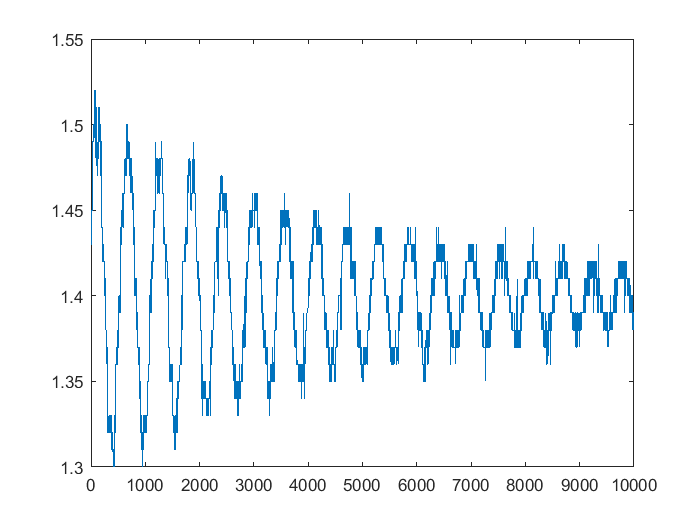

In [53]:
clear
close all
clc

delete(serialportfind); %Se eliminan conexiones via puerto serie previas
serialportlist("all") % Se enlistan los puertos serie disponibles para seleccionar el que identifique a la tarjeta
s = serialport("COM9",115200,"Timeout",5);% Se inicializa la comunicación serie a una taza de 115200 bauds 
configureTerminator(s,"LF")% Se indica el fin de trama con el cambio de línea
flush(s);% Se limpian los datos del buffer de recepción
datos=[];
for i=1:10000
    %pause(0.01)
  datos=[datos str2double(readline(s))]; % Se adquieren los datos 
end 

clear s % Se cierra la conexión

plot(datos)%Se grafican los datos adquiridos en forma de voltaje contra el tiempo

Una extensión del código anterior para leer dos canales analógicos se consique al enviar al puerto serie de la computadora la inforación de la lectura de muestras de ambos canales analógicos en un formato separado por comas. El código para la adquisición de los canales A0 y A3 de manera simultánea se presenta en el repositorio siguiete:

https://raw.githubusercontent.com/LuisGerardo2204/C-digo-Arduino/refs/heads/main/ESP32_dos_ADC.ino

El diagrama de conexiones para los canales analógicos de la tarjeta de desarrollo ESP32 se muestra en la {numref}`esp32_2ADC`. Los potenciometros simulan el voltaje de algún sensor con salida analógica en el rango de 0 a 3.3V.

```{figure} /images/ESP32_2ADC.png
:height: 320px
:name: esp32_2ADC
Diagrama para lectura analógica con ESP32, de dos canales.
```





ans = "COM9"

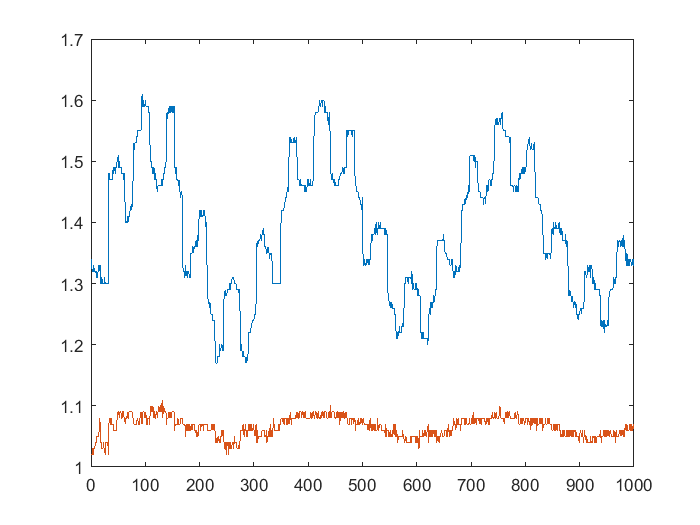

In [9]:
clear
close all
delete(serialportfind);
serialportlist("all")
s = serialport("COM9",115200,"Timeout",5);% Se inicializa la comunicación serie a una taza de 115200 bauds 
configureTerminator(s,"LF")% Se indica el fin de trama con el cambio de línea
flush(s);
datos=[];
for i=1:1000
    %pause(0.01)
  %datos=[datos str2double(readline(s))];
  datos=[datos readline(s)];
end 
canales =  split(datos,",");% Se separan los dos canales independientes
canal_a=str2double(canales(:,:,1));% Se convierte la cadena de caracteres recibida a un número real
canal_b=str2double(canales(:,:,2));
clear s

plot(canal_a)
hold on % Se grafican ambos canales en un mismo par de ejes.
plot(canal_b)

## Gracicación en tiempo real no estricto
Los ejemplos anteriores permiten la graficación de los datos en un contexto o formato conocido como post-procesamiento, esto quiere decir que primero se toma un número deseado de muestras y después se presentan en una gráfica. Este formato se usa especialmente cuando las tasas de muestreo, es decir cuando el número de muestras que se toman en un segundo es muy elevado y resultaría muy demandante actualizar una gráfica de manera que se puediera apreciar el cambio en las variables que están siendo monitoreadas de manera eficiente. Cuando el fenómeno lo permite, es posible mostar las gráficas de manera simultánea con su captura. Este esquema equivale a lo que sucede con la captura de video, si la resolución de la cámara es muy alta, es necesario tener tarjetas de video dedicadas que permitan hacer el despliegue de las imágenes, volviendo al contexto de la captura de voltajes,  si la resolución no es un tema crucial, se puede sacrificar precisión y velocidad de toma de muestras en aras de observar cambios en el fenómeno bajo análisis de manera más inmediata, sin esperar al postprocesamiento, esto puede entenderse como un análogo a lo que sucde en un osciloscopio, donde las señales se grafican en pantalla en tiempo real.

El siguiente código permite la visualización en tiempo real "suave", es decir, a baja velocidad de las lecturas de los voltajes en los canales A0 y A3 de la tarjeta ESP32.

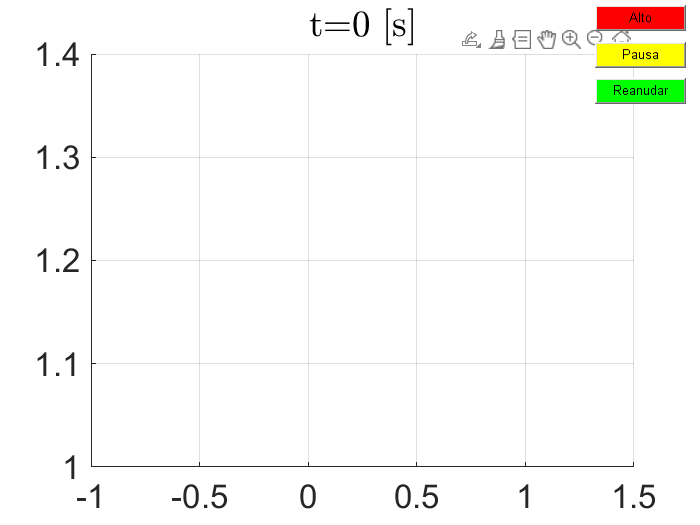

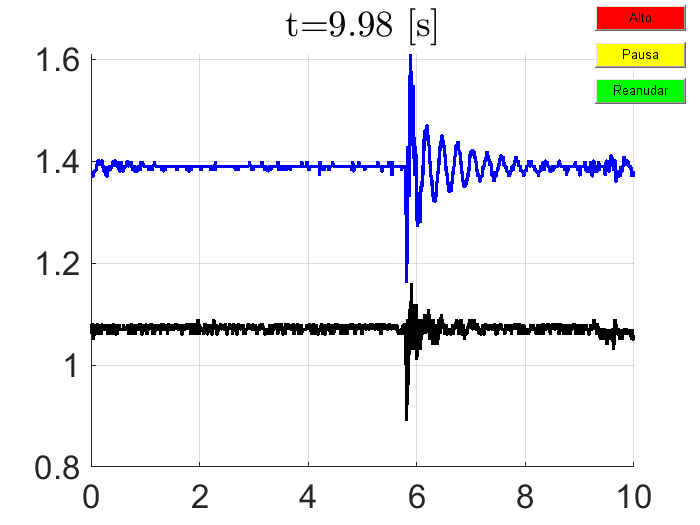

In [76]:
clear 
close all
clc

delete(serialportfind);
%serialportlist("all")
s = serialport("COM9",115200,"Timeout",5);;% Se inicializa la comunicación serie a una taza de 115200 bauds 
configureTerminator(s,"LF")% Se indica el fin de trama con el cambio de línea

datos=[];
canales=[];
canal_a=[];% Se inicializan las variables tipo arreglo para almacenar las muestras 
canal_b=[];
muestra=[];

% Creación del vector de tiempo
t=0:0.001:6;

uno=figure;
a=axes;
grid
hold on


%Se generan botones de control de animación especificndo su texto posición y color de fondo
  handle=uicontrol('style','pushbutton','units','normal','backgroundcolor','red','position', ...
            [0.85 .94 .13 .05],'String','Alto','callback','global stopstop;stopstop=1;'); 
 % Se da formato al texto de los ejes de las gráficas   
  handle2=uicontrol('style','pushbutton','units','normal','backgroundcolor','yellow','position', ...
            [0.85 .87 .13 .05],'String','Pausa','callback','global ppause;ppause=1;');
  handle3=uicontrol('style','pushbutton','units','normal','backgroundcolor','green','position', ...
            [0.85 .8 .13 .05],'String','Reanudar','callback','global ppause;ppause=0;');
set(gca,'defaulttextinterpreter','latex')
  

 
set(gca,'fontsize',20);
set(gca,'fontname','Arial','FontWeight','normal');  

global stopstop ppause;
ppause=0;
i=1;
stopstop =0;
% La animación se repetirá para cada valor de la función x(t) en cada instante de tiempo 
flush(s); 
while( i<1000&&stopstop==0)

  cla% Se actualiza la gráfica

   datos=[datos readline(s)]; % La lectura de los datos del puerto serie se hace de manera concatenada
   muestra=[muestra i];

   canales=split(datos(i),","); % Se separan las dos muestras instantáneas
   canal_a(i)=str2double(canales(1));% Se extrae el número real contenido en la cadena de datos recibida
   canal_b(i)=str2double(canales(2));
  
     
     cla
     title(strcat('t= ',num2str((i-1)*0.01),' [s]')) % Se coloca el instante de tiempo en el título de la gráfica
     plot(muestra(1:i)*0.01,canal_a(1:i),'b -','LineWidth',2)
     plot(muestra(1:i)*0.01,canal_b(1:i),'k -','LineWidth',2) %Se grafican las muestras de ambos canales
     pause(0.0001)
     
           while ppause==1
                    pause(.001)%Acción del botón de pausa
                  
            end
       i=i+1;       
       cla %pausa para animación
                    
end
    
clear s %Se cierra el puerto de comunicaciones 

plot(muestra*0.01,canal_a,'b -','LineWidth',2) %Se conserva la última gráfica
hold on 
plot(muestra*0.01,canal_b,'k -','LineWidth',2)


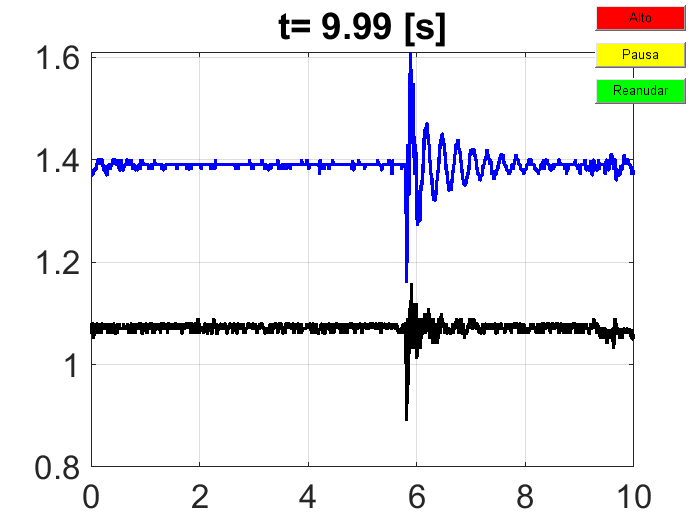

In [80]:
close all
figure



handle=uicontrol('style','pushbutton','units','normal','backgroundcolor','red','position', ...
            [0.85 .94 .13 .05],'String','Alto','callback','global stopstop;stopstop=1;'); 
 % Se da formato al texto de los ejes de las gráficas   
  handle2=uicontrol('style','pushbutton','units','normal','backgroundcolor','yellow','position', ...
            [0.85 .87 .13 .05],'String','Pausa','callback','global ppause;ppause=1;');
  handle3=uicontrol('style','pushbutton','units','normal','backgroundcolor','green','position', ...
            [0.85 .8 .13 .05],'String','Reanudar','callback','global ppause;ppause=0;');
  



plot(muestra*0.01,canal_a,'b -','LineWidth',2)
set(gca,'fontsize',20);
set(gca,'fontname','Arial','FontWeight','normal');  
title("t= "+num2str((i-1)*0.01)+" [s]")
grid
hold on
plot(muestra*0.01,canal_b,'k -','LineWidth',2)


## Encendido de relevadores via puerto serie

Una aplicación diferente de la comunicación con el puerto serie es la transmisión-recepción de comandos o instrucciones. Este esquema consiste en transmitir por el puerto serie un caracter o cadena de caracteres que se relacionan con instrucciones que se desea ejecute el sistema digital receptor, por otra parte, también se puede hacer uso de un esquema de respuesta que permita la recepción de un acuse de recibo de la información o comando. En la {numref}`esp32_UDP` se muestra el diagrama de conexiones para poner a prueba la comunicación serie en el contexto del control de procesos. Es muy común el uso del código ASCII para el envío de caracteres de un sistema digital a otro, comunmente, la comunicación se realiza entre una computadora y un microcontrolador, aunque también es frecuente la comunicación entre dos microcontroladores. EL código ASCII se puede consultar en el siguiente enlace:

https://www.ascii-code.com

```{figure} /images/ESP32_bb.png
:height: 320px
:name: esp32_UDP
Diagrama para conmutación de leds con protocolo UDP.
```
El código para la tarjeta arduino se encuentra en el siguiente repositorio:

https://raw.githubusercontent.com/LuisGerardo2204/C-digo-Arduino/refs/heads/main/ESP32_relays_serie.ino

In [82]:
% Programa de ejemplo de aplicación de la función menú para el control de 4 relevadores usando una 
% tarjeta ESP32 o una tarjeta Arduino de 8 bits

clear
close all
clc

delete(serialportfind);
serialportlist("all")
s = serialport("COM9",115200,"Timeout",5);% Se inicializa la comunicación serie a una taza de 115200 bauds 
configureTerminator(s,"LF")
flush(s); 
salir=0;
while salir==0
relay=menu("Control remoto","Encender relay 1","Apagar relay 1","Encender relay 2"...
    ,"Apagar relay 2","Encender relay 3","Apagar relay 3","Encender relay 4","Apagar relay 4",...
    "Encender todos","Apagar todos","Salir"); % Se desarrolla el menú con los botones necesarios para el control de los relevadores 
% Se usa un esquema de caracteres simples para la activación de los relevadores, dependiendo de la tecla del menú que se haya presionado
switch relay
% Conjunto de instrucciones del control remoto:
       case 1
       write(s,"A","uint8")  
       case 2 % El caracter A enciende el relevador 1
       write(s,"B","uint8")   
       case 3 % El caracter B apaga el relevador 1
       write(s,"C","uint8")  
       case 4 % El caracter C enciende el relevador 2
       write(s,"D","uint8")   
       case 5% El caracter C apaga el relevador 2
       write(s,"E","uint8")  
       case 6% El caracter D enciende el relevador 3
       write(s,"F","uint8")  
       case 7% El caracter E apaga el relevador 3
       write(s,"G","uint8")
       case 8% El caracter F enciende el relevador 3
       write(s,"H","uint8")    
       case 9% El caracter G apaga el relevador 3
       write(s,"I","uint8")  
       case 10% El caracter I enciende todos los relevadores
       write(s,"J","uint8") 
       case 11 % El caracter J apaga todos 
       salir=1;
end

end

clear s

ans = "COM9"

## Comunicación mediante el protocolo UDP

Una alternativa para la comunicación serie, que aprovecha la infraestructura de la red de area local es el protocolo UDP. El protocolo UDP utiliza una dirección ip, un pueto de escucha y un puerto de escritura. Es un protocolo menos robusto que el protocolo TCP-IP, pero es muy utilizado debido a su sencillez y portabilidad. El funcionamiento del protocolo UDP se forma de manera esquemática en la {numref}`com_UDP`, donde se muestra la infraestructura utilizada para su realización práctica, los dispositivos que se comunican con este protocolo deben estar conectados mediante el mismo router que les asigna una dirección ip, de manera que es posible el intercambio de información entre un máximo de 252 dispositivos en un mismo dominio. Es importante mencionar que no es indispensable que el router tenga accseso a internet para que se pueda dar la comunicación bajo el protocolo UDP, dado que la comunicación es estrictamente local. De la misma manera, cabe destacar que la conexión puede ser cableada o inalámbrica. 

```{figure} /images/UDP.png
:height: 250px
:name: com_UDP
Protocolo de comunicación UDP.
```
La velocidad de transmisión-recepción de información depende de las capacidades del router y de los dispositivos, velocidades típicas son de un máximo de 100Mbs es decir, 100 millones de bits por segundo, haciendo una diferencia sustancial con el protocolo serie, sin embargo, tambien es cierto que no es determinística la tasa de transmisión debido a la dependencia del canal de WiFi y del tráfico que se presente en la red de área local.

## Encendido de relevadores via protocolo UDP

De la misma manera que se hace en el protocolo serie, se puede hacer uso del protocolo UDP para enviar y recibir comandos a través de la red de área local. El código que permite la comunicación usando el protocolo UDP para el control de 4 salidas digitales se encuentra en el siguiente repositorio:

https://raw.githubusercontent.com/LuisGerardo2204/C-digo-Arduino/refs/heads/main/ESP32UDP.ino

El diagrama de conexiones para la tarjeta ESP32 es el mismo que se usó en el caso de la comunicación serie, es decir el mostrado en la  {numref}`esp32_UDP`. Es importante mencionar que este programa solo funciona con la tarjeta ESP32. Para poder implementar este programa en una tarjeta de 8 bits como la Arduno Uno o la Arduino mega es necesario usar un módulo o shield con conexión Ethernet o WiFi, debido a que la tarjeta ESP32 cuenta con estas prestaciones de manera nativa.

Usando el monitor serie del IDE de Arduino se obtiene tanto la dirección ip como el puerto de escucha para establecer la conexión UDP. Una vez cargado el código en la tarjeta ESP32, al correr el programa hace la conexión al router wifi y mostrará la dirección ip que le fue asignada, como se muestra en la {numref}`ip_serial`. El puerto de escucha es el 2020 dado que así está establecido en el código fuente.

```{figure} /images/UDP_ESP.png
:height: 200px
:name: ip_serial
Determinación de la ip asignada usando el monitor serial del IDE Arduino.
```

Una vez establecida la conexión entre la tarjeta ESP32 y el router wifi se puede probar su funcionamiento usando el siguiente programa de MATLAB®:

El siguiente programa hace el encendido y apagado secuencial de 4 relevadores en la tarjeta ESP32:



In [125]:
clear
close all
clc
%Las siguientes líneas de código permiten la creación de una conexión UDP entre la computadora que
% lo ejecuta y una tarjeta ESP32
u = udpport("IPV4") 
ip_remota="192.168.0.25";%Se inicializa la conexión usando protocolo UDP
puerto_remoto=2020; % Es necesario indicar la iderección ip y el puerto de escucha del destino
% A diferencia del protocolo serie, con el protocolo UDP es posible transmitir cadenas de caracteres completas
write(u,"E1","uint8",ip_remota,puerto_remoto);
pause(1) %El par de caracteres E1 encienden el relevador 1
write(u,"E2","uint8",ip_remota,puerto_remoto);
pause(1)%El par de caracteres E2 encienden el relevador 2
write(u,"E3","uint8",ip_remota,puerto_remoto);
pause(1)%El par de caracteres E3 encienden el relevador 3
write(u,"E4","uint8",ip_remota,puerto_remoto);
pause(2)%El par de caracteres E4 encienden el relevador 4
write(u,"A1","uint8",ip_remota,puerto_remoto);
pause(1)%El par de caracteres A1 apagan el relevador 1
write(u,"A2","uint8",ip_remota,puerto_remoto);
pause(1)%El par de caracteres A2 apagan el relevador 2
write(u,"A3","uint8",ip_remota,puerto_remoto);
pause(1)%El par de caracteres A3 apagan el relevador 3
write(u,"A4","uint8",ip_remota,puerto_remoto);
pause(2)%El par de caracteres A4 apagan el relevador 4

write(u,"Et","uint8",ip_remota,puerto_remoto);
pause(2)%El par de caracteres Et encienden todos los relevadores
write(u,"At","uint8",ip_remota,puerto_remoto);
pause(2)%El par de caracteres At apagan todos los relevadores
write(u,"Et","uint8",ip_remota,puerto_remoto);
pause(2)
write(u,"At","uint8",ip_remota,puerto_remoto);
disp('Cadena de caracteres recibidos como respuesta:')
datos = read(u,16,"uint8");
respuesta=num2str(char(datos))
clear u


u = 
  UDPPort with properties:

     IPAddressVersion: "IPV4"
            LocalHost: "0.0.0.0"
            LocalPort: 49664
                  Tag: ""
    NumBytesAvailable: 0

  Show all properties, functions

Cadena de caracteres recibidos como respuesta:


respuesta = 'llegaron 2 bytes'

Un programa parecido al que se realizó para el encendido de relevadores usando protocolo serie, en el formato de un menú, se puede desarrollar para el encendido y apagado de relevadores pero aprovechando las prestaciones del protocolo UDP, es decir, aprovechando las ventajas de un protocolo que uitiliza la infrestructura de la red de de area local y puede incluso ser inalámbrica. El siguiente código permite generar un control remoto para cuatro relevadores usando el protocolo UDP.

In [113]:
% Programa de ejemplo de aplicación de la función menú y el protocolo UDP

clear
close all
clc

clear
close all
clc
u = udpport("IPV4")
ip_remota="192.168.0.25";
puerto_remoto=2020;

salir=0;
while salir==0
relay=menu("Control remoto","Encender relay 1","Apagar relay 1","Encender relay 2"...
    ,"Apagar relay 2","Encender relay 3","Apagar relay 3","Encender relay 4","Apagar relay 4",...
    "Encender todos","Apagar todos","Salir");

switch relay

       case 1
         write(u,"E1","uint8",ip_remota,puerto_remoto);
       case 2
         write(u,"A1","uint8",ip_remota,puerto_remoto); 
       case 3
         write(u,"E2","uint8",ip_remota,puerto_remoto);
       case 4
         write(u,"A2","uint8",ip_remota,puerto_remoto);   
       case 5
         write(u,"E3","uint8",ip_remota,puerto_remoto);
       case 6
         write(u,"A3","uint8",ip_remota,puerto_remoto); 
       case 7
         write(u,"E4","uint8",ip_remota,puerto_remoto);
       case 8
         write(u,"A4","uint8",ip_remota,puerto_remoto);   
       case 9
         write(u,"Et","uint8",ip_remota,puerto_remoto);
       case 10
         write(u,"At","uint8",ip_remota,puerto_remoto);
       case 11
       salir=1;
end
end

clear s

u = 
  UDPPort with properties:

     IPAddressVersion: "IPV4"
            LocalHost: "0.0.0.0"
            LocalPort: 65353
                  Tag: ""
    NumBytesAvailable: 0

  Show all properties, functions

Es importante señalar que el protocolo UDP de comunicación en área local se utiliza para envío-recepción de tramas de datos de importancia no muy crítica, en equipos de adquisición de datos de altas prestaciones se usa el protocolo TCP-ip, dado que ofrece un método de acuse de recepción de la información de manera intrínseca.

## Ejercicio de la práctica 16

1. Escriba un programa que permita el acceso a una cámara ip de libre visualización, muestre la vista previa de la cámara, realice una captura y haga las siguientes operaciones con la imagen captura:


a) En otra figura muestre la imagen original y su versión en el formato HSV con el factor 0.85 aplicado a la matriz de color o matiz.

c) En una tercer figura muestre la imagen original y la figura con la siguientes transformaciones:

$$
Y= 0.5R+0.2G+0.75B,~~~~I=-0.8R-0.4,3.5G-0.4B,~~~~~Q=0.707R+0.52G-0.62B
$$

donde $R$ es la matriz componente rojo, $B$ es la matriz componente azul y $G$ es la matriz componente verde. Use el comando `imshow(cat(3,Y,I,Q))` para mostrar la imagen transformada.

2. Realice una captura con una camara web y ajuste el contraste usando la instrucción `imadjust(I,[minR minG minB;maxR maxG maxB],[])` con los siguientes parámetros: minR=0.3, minG=0.25 minB=0.45, maxR=0.67, maxG=0.68 y maxB=0.62.

3. Escriba un programa que permita capturar 100 muestras de uno de los canales analógicos de una tarjeta conectada al puerto serie y realice las siguientes operaciones con los datos:

    a) Reste el promedio de todos los datos a cada uno de los datos adquridos (datos_nuevo=datos -mean(datos)) y   alamacénelos en una variable. 

    b) Encuentre la desviación estandard de los datos.

   
    c) Encuentre el máximo y el mínimo de los datos.

   
    d) En una figura independiente, grafique los datos originales contra el tiempo y los datos a los que se les ha restado el promedio contra el tiempo.

5. Escriba un programa que permita el encendido secuencial de 4 salidas digitales. Utilice un comando para encender las salidas en orden ascendente, uno para apagarlos en orden descendente, con un retardo de un segundo entre cada activación o desactivación e incluya un botón de apagado de todas las salidas al mismo tiempo.  Puede usar el protocolo serie si utiliza una tarjeta Arduino basada en ATmega o, de manera opcional, el protocolo UDP si tiene disponible una tarjeta ESP32.  